# Proyecto 3
Estuardo Díaz 16110

In [1]:
import numpy as np
from scipy import linalg
import matplotlib
import matplotlib.pyplot as plt

### Algoritmos a utilizar:

In [ ]:
def Jacobi(A,b,x0,N=100,tol=0.001):
    for k in range(N):
        print(k,": ", x0)
        x = np.zeros_like(x0)
        for i in range(A.shape[0]):
            x[i] = (b[i] - sum(A[i,:]*x0) + A[i,i]*x0[i]) / A[i, i]
        if np.allclose(x0, x, atol=tol, rtol=0.):
            return x
        x0 = x
    print("Se excedió el número máximo de iteraciones")
    return x

In [ ]:
def GaussSeidel(A,b,x0,N=100,tol=0.001):
    for k in range(N):
        print(k,": ",x0)
        x = np.zeros_like(x0)
        for i in range(A.shape[0]):
            x[i] = (b[i] - sum(A[i, :i]*x[:i]) - sum(A[i, i + 1:]*x0[i + 1:])) / A[i, i]
        if np.allclose(x0, x, rtol=tol):
            return x
        x0 = x
    print("Se excedió el número máximo de iteraciones")
    return x

In [ ]:
def SOR(A, b, x0, w=0.5, N=100, tol=0.001):
    x = x0
    for k in range(N):
        print(k,": ",x0)
        for i in range(A.shape[0]):
            x[i] = (1 - w) * x[i] + (w / A[i][i]) * (b[i] - sum(A[i,:]*x) + A[i,i]*x[i])
        if np.linalg.norm(A.dot(x) - np.transpose(b)) < tol:
            return x
    print("Se excedió el número máximo de iteraciones")
    return x

## a) Matriz mal condicionada

Definimos la **condición** de $A$ como $cond(A) := ||A||\cdot ||A^{-1}||$

In [100]:
def cond(A):
    inv_A = linalg.inv(A)
    return linalg.norm(A)*linalg.norm(inv_A)

Consideremos la matriz $H$ mal condicionada siguiente:

La matriz de Hilbert es una matriz $H$ de $n\times n$ cuyas entradas están dadas por $$H_{ij} = \frac{1}{i+j-1}$$  

In [101]:
def getHilbertMatrix(n = 5):
    H = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            H[i,j] = 1/(i+j+1)
    return H


In [102]:
H = getHilbertMatrix()
H

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111]])

In [103]:
print("cond(H): ",cond(H))

cond(H):  480849.1169946838


Como la condición de $H$ es muy grande, sabemos que la matriz es mal condicionada. Por lo tanto, la factorización no es buena. Sin embargo, la factorización $PL U$ funciona bastante bien.

In [104]:
P, L, U = factorizar(H)
PL = P.dot(U)
print("Norma de (PL*U - H): ", linalg.norm(PL.dot(U) - H))
print("PL*U - H:")
PL.dot(U) - H

Norma de (PL*U - H):  1.0159548154646056
PL*U - H:


array([[ 0.        ,  0.04166667,  0.04259259,  0.03906746,  0.03528118],
       [-0.5       , -0.33333333, -0.24996914, -0.19995966, -0.16662574],
       [-0.33333333, -0.24305556, -0.19308642, -0.16040344, -0.13723442],
       [-0.25      , -0.2       , -0.16666667, -0.14285714, -0.125     ],
       [-0.2       , -0.16666667, -0.14285714, -0.12499949, -0.11111009]])

Si lo calculamos para $H$ con $n=100$ obtenemos aún resultados similares:

In [105]:
H = getHilbertMatrix(100)
print("cond(H): ",cond(H))
P, L, U = factorizar(H)
PL = P.dot(L)
print("Norma de (PL*U - H): ", linalg.norm(PL.dot(U) - H))
print("PL*U - H:")
PL.dot(U) - H

cond(H):  6.559574546502786e+19
Norma de (PL*U - H):  1.985159670420475e-16
PL*U - H:


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  1.73472348e-18, ...,
        -2.60208521e-18, -1.73472348e-18,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.73472348e-18,  8.67361738e-19],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

## b) Matriz de insumo producto

La matriz de insumo-producto es una matriz que representa las compras y ventas de varios sectores de economía y se utilizan para predecir demanda o la producción que se requiere para satisfacer la demanda.

En este ejemplo, $A$ es la matriz de insumo producto sobre los sectores de Agricultura, Industria y Servicios. La variable $y$ representa la demanda y queremos calcular $x$, la producción bruta.
\begin{align}
x &= Ax + y \\
x - Ax &= y \\
x(I - A) &= y\\
x &= (I-A)^{-1}y
\end{align}

In [106]:
A = np.array([[0.2, 0.1, 0.2],[0.5, 0.2, 0.1],[0.3, 0.7, 0.1]])
print("A:\n",A)

A:
 [[0.2 0.1 0.2]
 [0.5 0.2 0.1]
 [0.3 0.7 0.1]]


In [107]:
y = np.array([[600],[1000],[700]])
print("y:\n",y)

y:
 [[ 600]
 [1000]
 [ 700]]


Llamamos la la matriz $(I-A)$ la matriz de Leontief y $(I-A)^{-1}$ la matriz inversa de Leontief

In [108]:
Leontief = np.identity(3)- A
print("Matriz de Leontief:\n", Leontief)
invLeontief = linalg.inv(Leontief)
print("Matriz inversa de Leontief:\n", invLeontief)

Matriz de Leontief:
 [[ 0.8 -0.1 -0.2]
 [-0.5  0.8 -0.1]
 [-0.3 -0.7  0.9]]
Matriz inversa de Leontief:
 [[1.83615819 0.64971751 0.48022599]
 [1.3559322  1.86440678 0.50847458]
 [1.66666667 1.66666667 1.66666667]]


Sin embargo para calcular la inversa, podemos utilizar la factorización $LU$ para encontrar la solucion

Encontramos $x$ como $x = (I-A)^{-1}y$

In [109]:
I = np.identity(len(y))
x = resolver(I-A,y)
print("x:\n",x)

x:
 [[2087.57062147]
 [3033.89830508]
 [3833.33333333]]


Notamos que la solución es efectivamente correcta

In [110]:
print("x - (Ax+y):")
print(x-(A.dot(x)+y))

x - (Ax+y):
[[0.00000000e+00]
 [0.00000000e+00]
 [4.54747351e-13]]


## c) Regresión múltiple

Podemos utilizar regrecion lineal multiple para encontrar una recta que representa el comportamiento de un conjunto de datos.

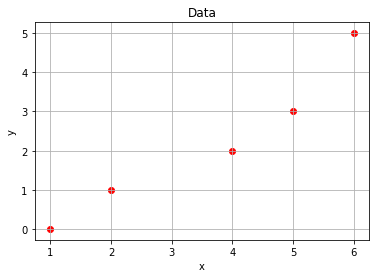

In [111]:
x = np.array([1,2,4,5,6])
y = np.array([0,1,2,3,5])
# Plot
fig, ax = plt.subplots()
ax.scatter(x, y, color='red')

ax.set(xlabel='x', ylabel='y',
       title='Data')
ax.grid()
plt.show()

Suponemos que los datos siguen un comportamiento lineal, entonces definimos las ecuaciones
\begin{align}
Ax &= b\\
A^TA \hat{x} &= A^Tb
\end{align}
Donde $A$ esta dado por $A = \binom{x}{1}$. Entonces si encontramos la inversa de $A^TA$ el problema se reduce a resolver un sistema de la forma $Ax=b$.

In [112]:
A = np.transpose(np.array([x,np.ones(len(x))]))
print("A:\n",A)
ATA = np.transpose(A).dot(A)
print("ATA:\n",ATA)
ATb = np.transpose(A).dot(np.transpose(y))
print("ATb\n:",ATb)

A:
 [[1. 1.]
 [2. 1.]
 [4. 1.]
 [5. 1.]
 [6. 1.]]
ATA:
 [[82. 18.]
 [18.  5.]]
ATb
: [55. 11.]


Utilizamos el metodo de factorizacon $LU$ para encontrar la inversa y resolver el sistema de ecuaciones. Con esto obtenemos los parametros de la recta que mejor se ajustan a nuestros datos.

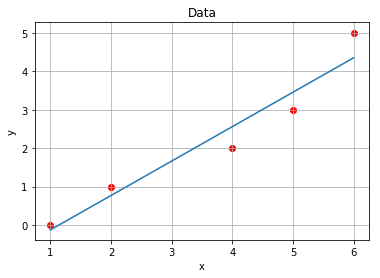

In [113]:
sol = resolver(ATA, ATb)
m = sol[0]
b = sol[1]

fig, ax = plt.subplots()
ax.scatter(x, y, color = 'red')
l = np.linspace(min(x),max(x),100)
ax.plot(l,m*l+b )
ax.set(xlabel='x', ylabel='y',
       title='Data')
ax.grid()
plt.show()

### Referencias
* Weisstein, Eric W. "Hilbert Matrix." From MathWorld--A Wolfram Web Resource. http://mathworld.wolfram.com/HilbertMatrix.html
* Prof. Waldo Marquez González, "La Matriz de Leontief", EL PROBLEMA ECONOMICO DE LAS RELACIONES INTERINDUSTRIALES. http://www.ehu.eus/Jarriola/Docencia/EcoEsp/matriz-de-leontief.pdf
* Dr. Peyam, Linear regression. https://www.youtube.com/watch?v=-bgrezOT0VQ